<a href="https://colab.research.google.com/github/bunny47xxx/AI/blob/main/2435775_SushanShrestha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 10 rows:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.72

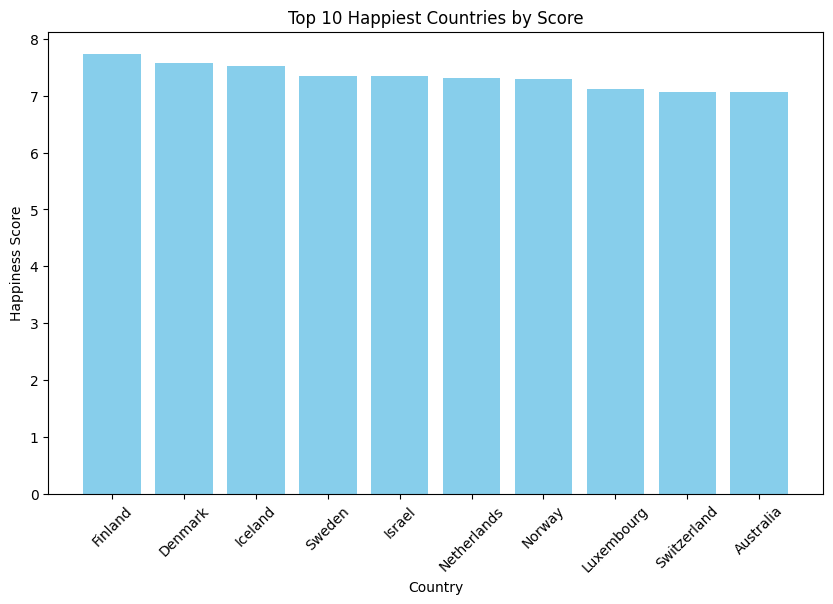

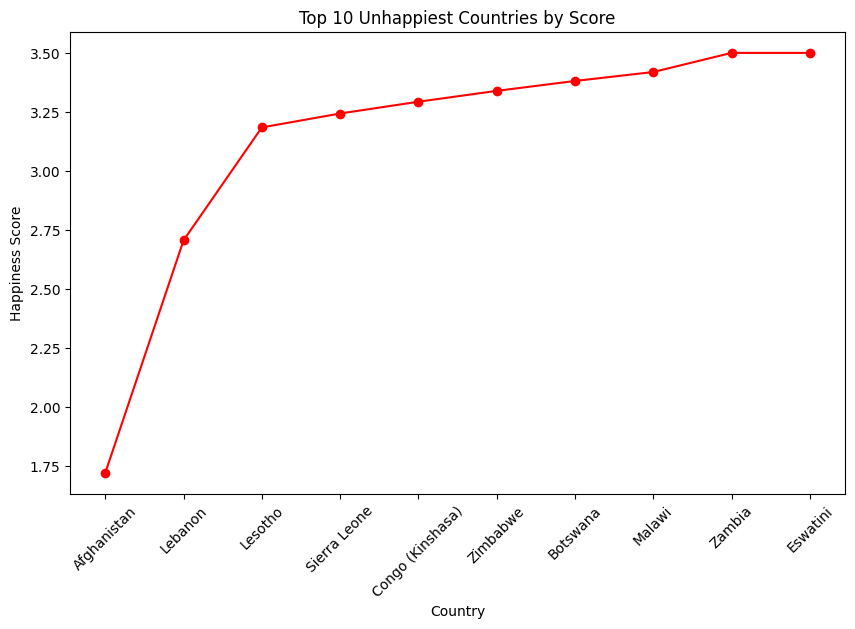

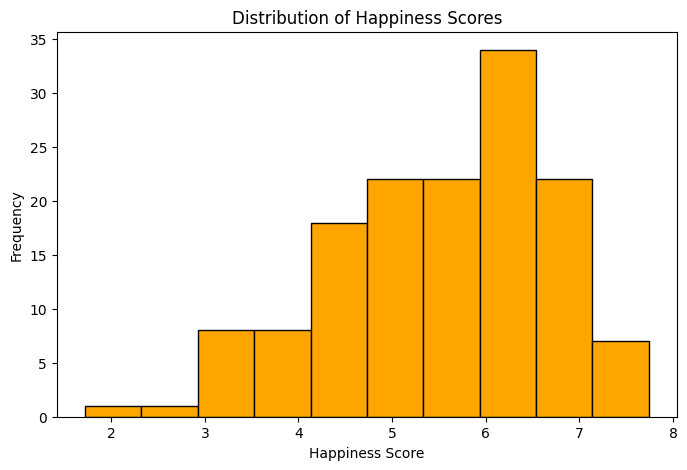

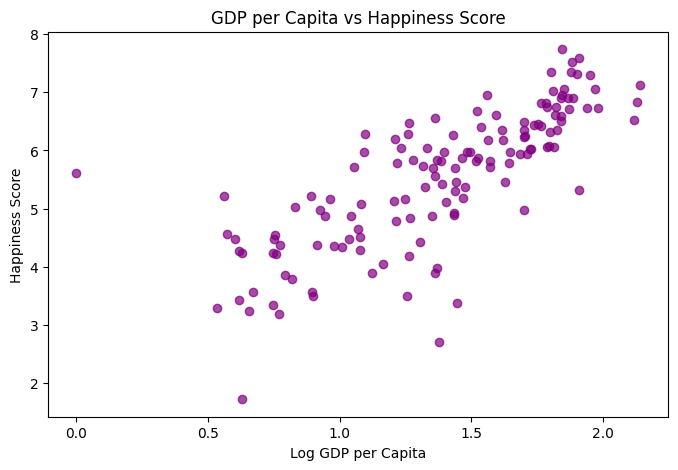

In [ ]:
#Question no 1
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Ai/Assignment1/WHR-2024-5CS037.csv'
data = pd.read_csv('/content/drive/MyDrive/Ai/Assignment1/WHR-2024-5CS037.csv')

# 1. Data Exploration and Understanding
# 1.1 Display the first 10 rows of the dataset
print("First 10 rows:")
print(data.head(10))

# 1.2 Identify the number of rows and columns in the dataset
rows, cols = data.shape
print(f"\nNumber of rows: {rows}, Number of columns: {cols}")

# 1.3 List all the columns and their data types
print("\nColumns and their data types:")
print(data.info())

# 2. Basic Statistics
# 2.1 Calculate mean, median, and standard deviation for the Score column
score_mean = data['score'].mean()
score_median = data['score'].median()
score_std = data['score'].std()
print(f"\nScore - Mean: {score_mean}, Median: {score_median}, Standard Deviation: {score_std}")

# 2.2 Identify the country with the highest and lowest happiness scores
highest_score_country = data.loc[data['score'].idxmax(), 'Country name']
lowest_score_country = data.loc[data['score'].idxmin(), 'Country name']
print(f"\nCountry with highest score: {highest_score_country}")
print(f"Country with lowest score: {lowest_score_country}")

# 3. Missing Values
# 3.1 Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# 4. Filtering and Sorting
# 4.1 Filter countries with Score > 7.5
filtered_data = data[data['score'] > 7.5]
print("\nCountries with Score > 7.5:")
print(filtered_data)

# 4.2 Sort the filtered dataset by GDP per Capita in descending order
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries sorted by GDP per Capita:")
print(sorted_data.head(10))

# 5. Adding New Columns
# 5.1 Create a new column "Happiness Category"
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("\nDataset with Happiness Category added:")
print(data.head())

# 6. Data Visualizations
# 6.1 Bar Plot: Top 10 happiest countries by Score
top_10_happiest = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['Country name'], top_10_happiest['score'], color='skyblue')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

# 6.2 Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

# 6.3 Histogram for Score
plt.figure(figsize=(8, 5))
plt.hist(data['score'], bins=10, color='orange', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

# 6.4 Scatter Plot: GDP per Capita vs Score
plt.figure(figsize=(8, 5))
plt.scatter(data['Log GDP per capita'], data['score'], alpha=0.7, color='purple')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

Ouestion no 1

<ipython-input-2-13cb4f922838>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (


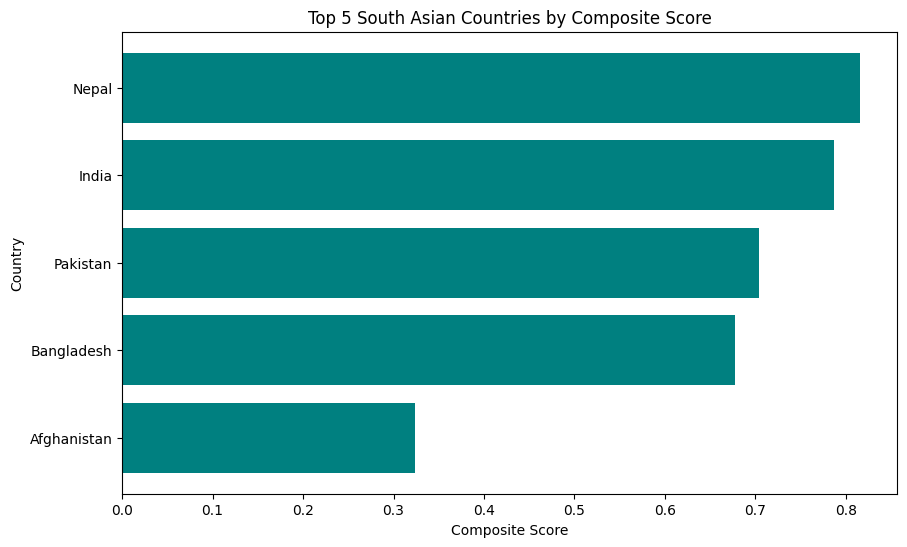

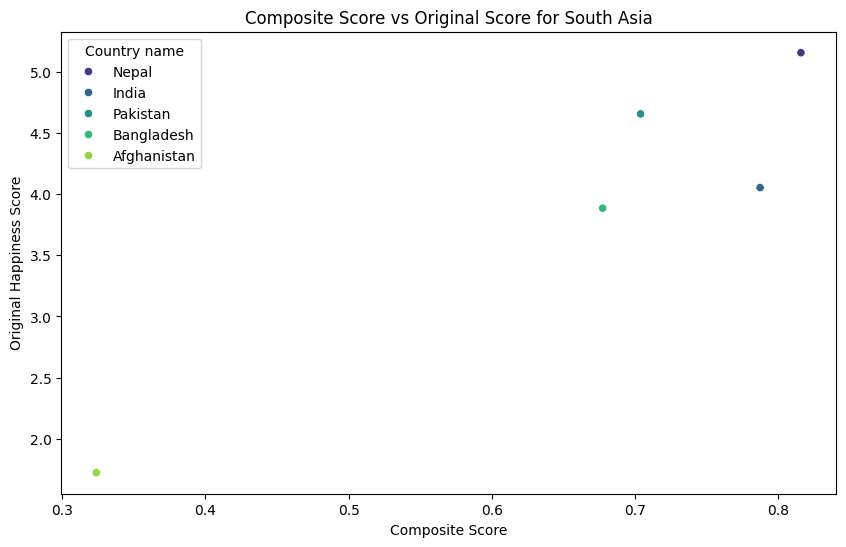

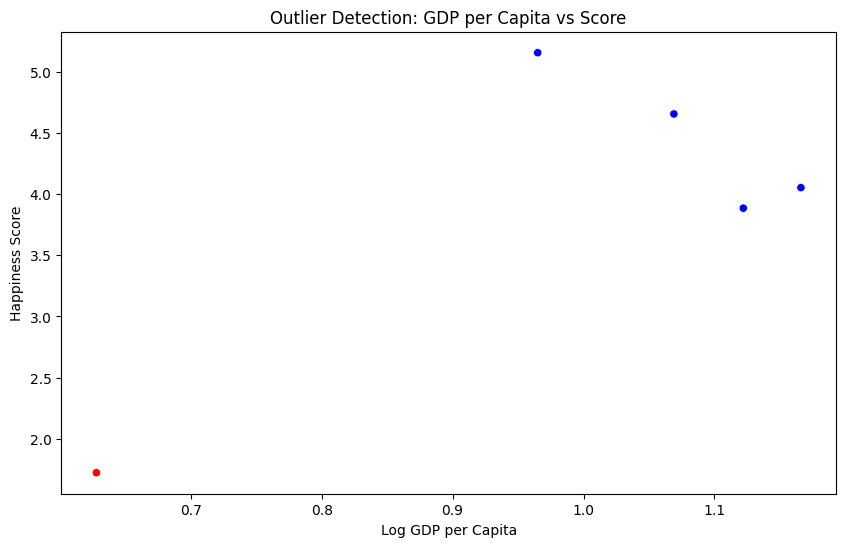

Pearson Correlations with Happiness Score:
{'Freedom to make life choices': 0.801497903141921, 'Generosity': 0.8773326267276359}


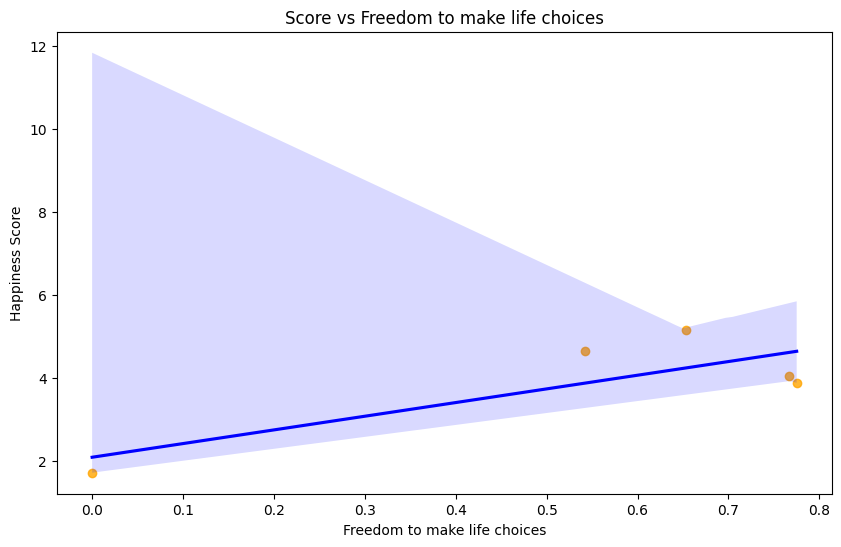

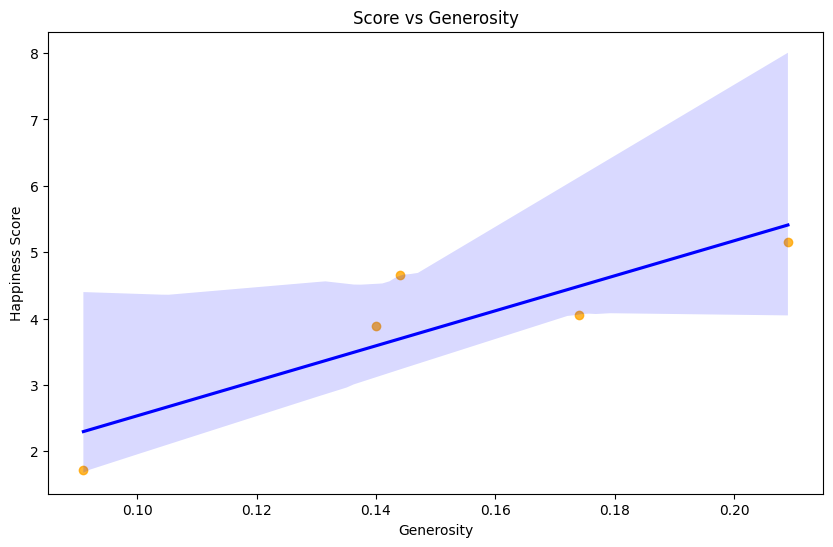

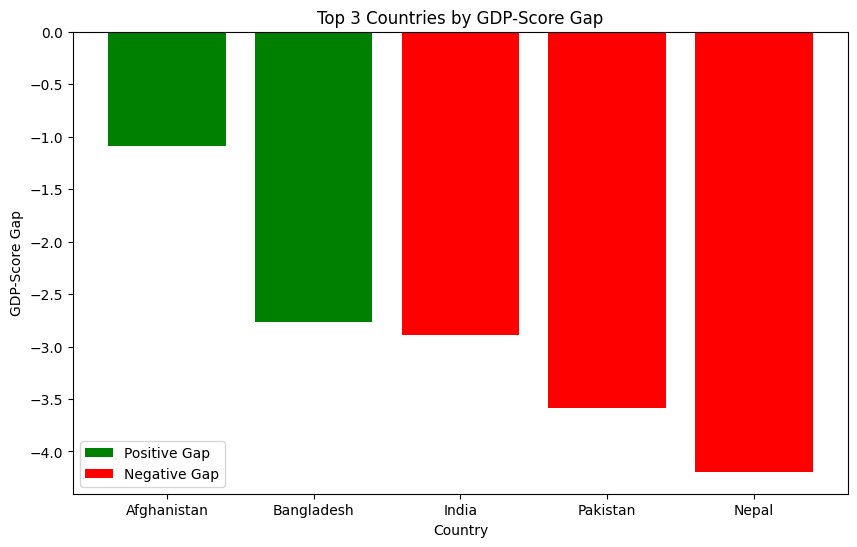

In [ ]:
#Question no 2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Ai/Assignment1/WHR-2024-5CS037.csv'
data = pd.read_csv('/content/drive/MyDrive/Ai/Assignment1/WHR-2024-5CS037.csv')

# Define South Asian countries
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Srilanka"
]

# Filter the dataset for South Asian countries
south_asia_df = data[data['Country name'].isin(south_asian_countries)]

# Save the filtered dataset to a CSV file
south_asia_df.to_csv('SouthAsia_Data.csv', index=False)

# Task 2: Composite Score Ranking
# Create Composite Score column
south_asia_df['Composite Score'] = (
    0.40 * south_asia_df['Log GDP per capita'] +
    0.30 * south_asia_df['Social support'] +
    0.30 * south_asia_df['Healthy life expectancy']
)

# Rank countries based on Composite Score
south_asia_df = south_asia_df.sort_values(by='Composite Score', ascending=False)

# Visualize the top 5 countries based on Composite Score
top_5 = south_asia_df.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5['Country name'], top_5['Composite Score'], color='teal')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

# Compare Composite Score with original Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Composite Score', y='score', hue='Country name', palette='viridis')
plt.title('Composite Score vs Original Score for South Asia')
plt.xlabel('Composite Score')
plt.ylabel('Original Happiness Score')
plt.show()

# Task 3: Outlier Detection
# Define outliers using 1.5 x IQR rule
q1_gdp = south_asia_df['Log GDP per capita'].quantile(0.25)
q3_gdp = south_asia_df['Log GDP per capita'].quantile(0.75)
iqr_gdp = q3_gdp - q1_gdp

q1_score = south_asia_df['score'].quantile(0.25)
q3_score = south_asia_df['score'].quantile(0.75)
iqr_score = q3_score - q1_score

# GDP and Score outlier thresholds
gdp_outliers = ((south_asia_df['Log GDP per capita'] < (q1_gdp - 1.5 * iqr_gdp)) |
                (south_asia_df['Log GDP per capita'] > (q3_gdp + 1.5 * iqr_gdp)))

score_outliers = ((south_asia_df['score'] < (q1_score - 1.5 * iqr_score)) |
                  (south_asia_df['score'] > (q3_score + 1.5 * iqr_score)))

# Highlight outliers in scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=south_asia_df, x='Log GDP per capita', y='score', hue=gdp_outliers | score_outliers,
    palette={False: 'blue', True: 'red'}, legend=False
)
plt.title('Outlier Detection: GDP per Capita vs Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# Task 4: Exploring Trends Across Metrics
# Choose metrics and calculate Pearson correlation
correlation_metrics = ['Freedom to make life choices', 'Generosity']
correlations = {
    metric: south_asia_df[metric].corr(south_asia_df['score']) for metric in correlation_metrics
}
print("Pearson Correlations with Happiness Score:")
print(correlations)

# Create scatter plots with trendlines
for metric in correlation_metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(data=south_asia_df, x=metric, y='score', scatter_kws={'color': 'orange'}, line_kws={'color': 'blue'})
    plt.title(f'Score vs {metric}')
    plt.xlabel(metric)
    plt.ylabel('Happiness Score')
    plt.show()

# Task 5: Gap Analysis
# Add GDP-Score Gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']

# Rank countries by GDP-Score Gap
gap_sorted = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)
largest_positive_gap = gap_sorted.head(3)
largest_negative_gap = gap_sorted.tail(3)

# Visualize top 3 countries with largest positive and negative gaps
plt.figure(figsize=(10, 6))
plt.bar(largest_positive_gap['Country name'], largest_positive_gap['GDP-Score Gap'], color='green', label='Positive Gap')
plt.bar(largest_negative_gap['Country name'], largest_negative_gap['GDP-Score Gap'], color='red', label='Negative Gap')
plt.title('Top 3 Countries by GDP-Score Gap')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.legend()
plt.show()



Descriptive Statistics:
South Asia - Mean: 3.8952, Std Dev: 1.3160025455902433
Middle East - Mean: 5.412100000000001, Std Dev: 1.5662011684327144

The region with higher average happiness score is: Middle East


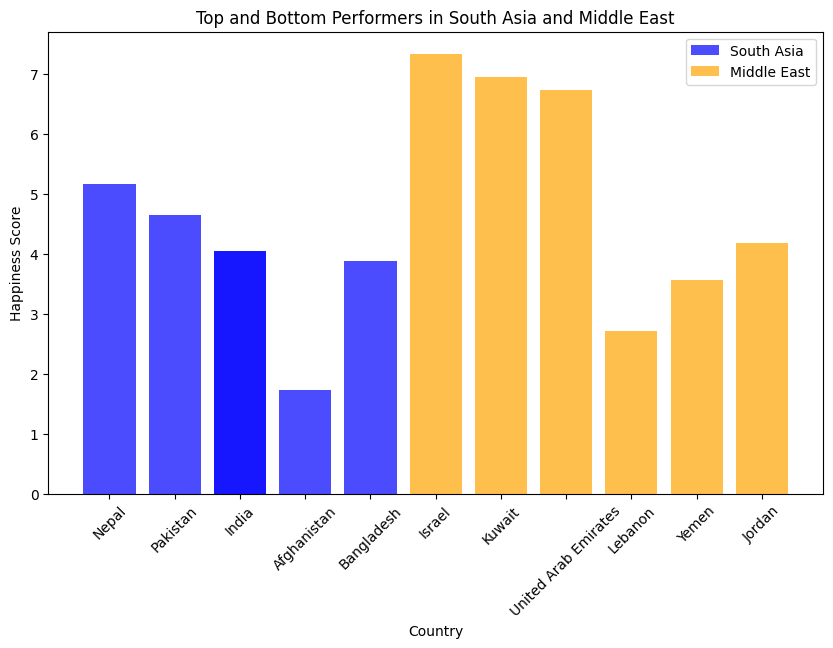

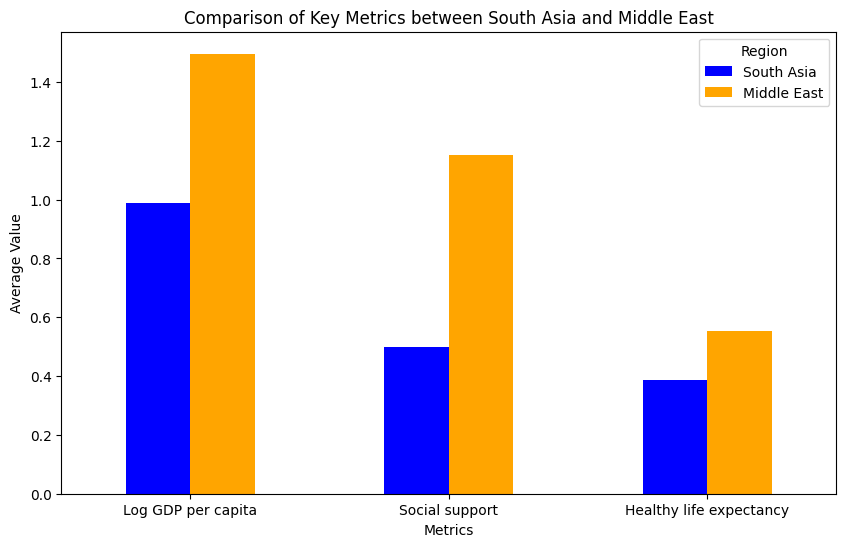


Happiness Disparity:
South Asia - Range: 3.4370000000000003, Coefficient of Variation: 0.33785236845097644
Middle East - Range: 4.634, Coefficient of Variation: 0.28938880812119405

Correlations in South Asia:
Freedom to make life choices: 0.801497903141921
Generosity: 0.8773326267276359


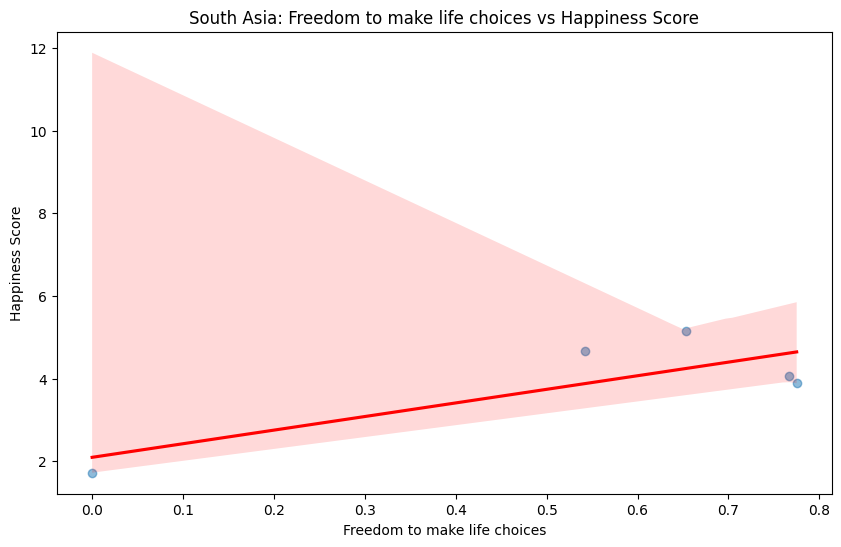

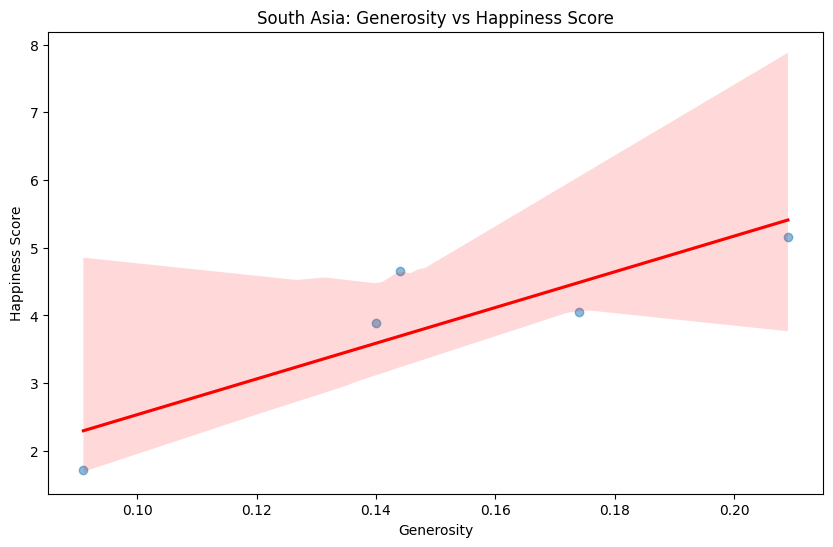


Correlations in Middle East:
Freedom to make life choices: 0.8632202433827543
Generosity: 0.6275236536964182


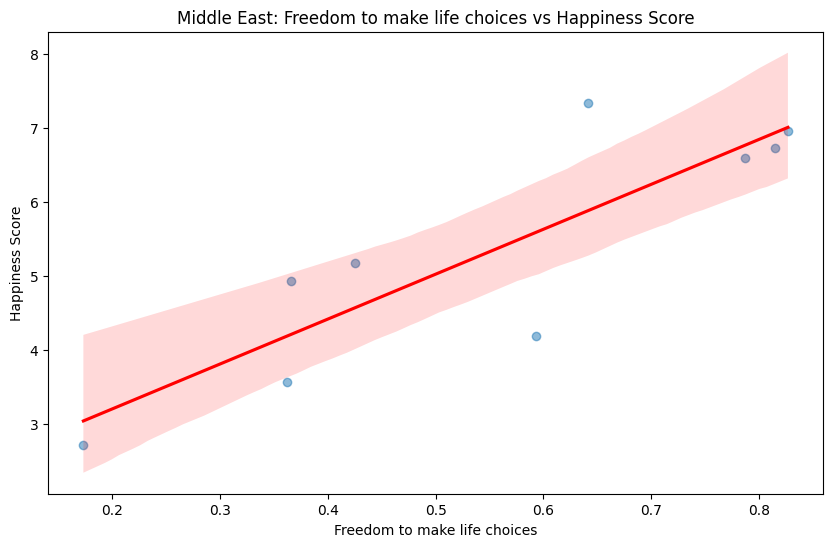

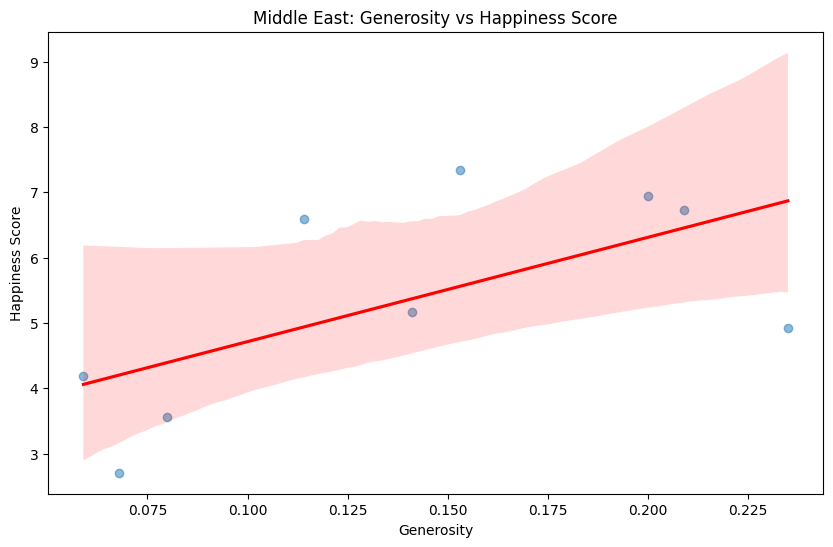

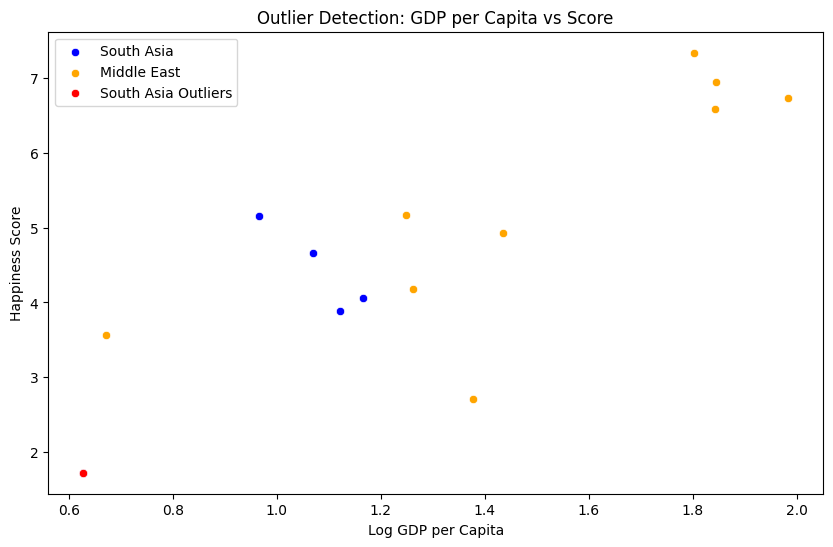

<ipython-input-3-e64d74dd9ff5>:124: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], palette=['blue', 'orange'])


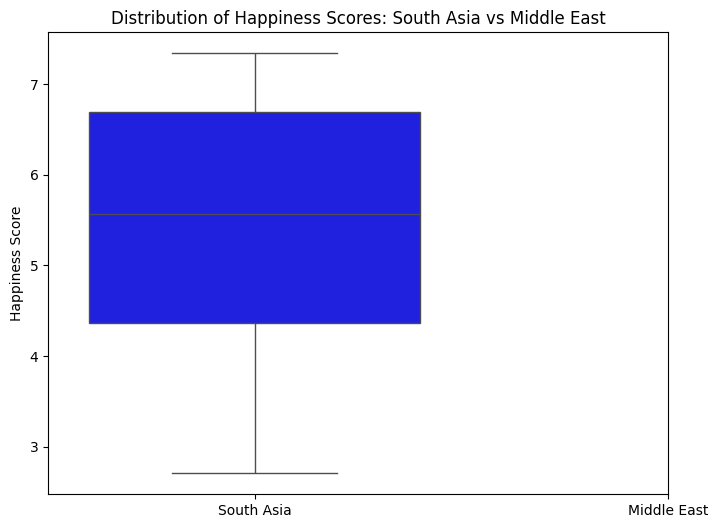

In [ ]:
#Question no 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Ai/Assignment1/WHR-2024-5CS037.csv'
data = pd.read_csv('/content/drive/MyDrive/Ai/Assignment1/WHR-2024-5CS037.csv')

# Define Middle Eastern countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon",
    "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

# Filter datasets for South Asia and Middle East
middle_east_df = data[data['Country name'].isin(middle_east_countries)]

# Save the filtered dataset for Middle East
middle_east_df.to_csv('MiddleEast_Data.csv', index=False)

# Descriptive Statistics
# Calculate mean and standard deviation for Score in both regions
south_asia_stats = south_asia_df['score'].agg(['mean', 'std'])
middle_east_stats = middle_east_df['score'].agg(['mean', 'std'])

print("\nDescriptive Statistics:")
print(f"South Asia - Mean: {south_asia_stats['mean']}, Std Dev: {south_asia_stats['std']}")
print(f"Middle East - Mean: {middle_east_stats['mean']}, Std Dev: {middle_east_stats['std']}")

# Compare mean happiness scores
higher_happiness_region = "South Asia" if south_asia_stats['mean'] > middle_east_stats['mean'] else "Middle East"
print(f"\nThe region with higher average happiness score is: {higher_happiness_region}")

# Top and Bottom Performers
south_asia_top_bottom = pd.concat([
    south_asia_df.nlargest(3, 'score'), south_asia_df.nsmallest(3, 'score')
])
middle_east_top_bottom = pd.concat([
    middle_east_df.nlargest(3, 'score'), middle_east_df.nsmallest(3, 'score')
])

# Plot bar charts for top and bottom performers
plt.figure(figsize=(10, 6))
plt.bar(south_asia_top_bottom['Country name'], south_asia_top_bottom['score'], color='blue', alpha=0.7, label='South Asia')
plt.bar(middle_east_top_bottom['Country name'], middle_east_top_bottom['score'], color='orange', alpha=0.7, label='Middle East')
plt.title('Top and Bottom Performers in South Asia and Middle East')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Metric Comparisons
key_metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
metric_means = pd.DataFrame({
    'South Asia': south_asia_df[key_metrics].mean(),
    'Middle East': middle_east_df[key_metrics].mean()
})

metric_means.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Region')
plt.show()

# Happiness Disparity
south_asia_range = south_asia_df['score'].max() - south_asia_df['score'].min()
south_asia_cv = south_asia_df['score'].std() / south_asia_df['score'].mean()

middle_east_range = middle_east_df['score'].max() - middle_east_df['score'].min()
middle_east_cv = middle_east_df['score'].std() / middle_east_df['score'].mean()

print("\nHappiness Disparity:")
print(f"South Asia - Range: {south_asia_range}, Coefficient of Variation: {south_asia_cv}")
print(f"Middle East - Range: {middle_east_range}, Coefficient of Variation: {middle_east_cv}")

# Correlation Analysis
correlation_metrics = ['Freedom to make life choices', 'Generosity']
for region, region_df in [('South Asia', south_asia_df), ('Middle East', middle_east_df)]:
    print(f"\nCorrelations in {region}:")
    for metric in correlation_metrics:
        corr = region_df[metric].corr(region_df['score'])
        print(f"{metric}: {corr}")

    # Scatter plots for correlation analysis
    for metric in correlation_metrics:
        plt.figure(figsize=(10, 6))
        sns.regplot(data=region_df, x=metric, y='score', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
        plt.title(f'{region}: {metric} vs Happiness Score')
        plt.xlabel(metric)
        plt.ylabel('Happiness Score')
        plt.show()

# Outlier Detection
# Define outliers using 1.5 x IQR rule for both regions
def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

south_asia_outliers = detect_outliers(south_asia_df, 'score')
middle_east_outliers = detect_outliers(middle_east_df, 'score')

# Visualization for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=south_asia_df, x='Log GDP per capita', y='score', label='South Asia', color='blue')
sns.scatterplot(data=middle_east_df, x='Log GDP per capita', y='score', label='Middle East', color='orange')
sns.scatterplot(data=south_asia_outliers, x='Log GDP per capita', y='score', color='red', label='South Asia Outliers')
sns.scatterplot(data=middle_east_outliers, x='Log GDP per capita', y='score', color='purple', label='Middle East Outliers')
plt.title('Outlier Detection: GDP per Capita vs Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

# Boxplot for distribution comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=[south_asia_df['score'], middle_east_df['score']], palette=['blue', 'orange'])
plt.xticks([0, 1], ['South Asia', 'Middle East'])
plt.title('Distribution of Happiness Scores: South Asia vs Middle East')
plt.ylabel('Happiness Score')
plt.show()
